In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from matplotlib.ticker import PercentFormatter

#import cleaned CMS data with prescriptions summed to state level
cms_df=pd.read_csv('data/state_summary_df.csv')
cms_df.head()

,State,Total Providers,Total Rx,Total Opioid Rx,Average Opioid Rx,Number of Top Providers
0,AK,1623,1062952,75776,7.128826,19
1,AL,11365,25804989,2042805,7.916318,146
2,AR,6802,16607909,1124700,6.772075,86
3,AZ,16558,22004918,1534577,6.973791,285
4,CA,85888,123983374,6702051,5.405605,602


In [2]:
#import cleaned cause of death data from CMS for the 55+ population
od_df=pd.read_csv('data/55+data.csv')
od_df=od_df.loc[od_df['Year']==2017]

In [3]:
#function to convert state name to 2 letter abbreviation
def convert_state(name):
    if name=="Alabama": return "AL"
    elif name=='Alaska': return "AK"
    elif name=="Arizona": return 'AZ'
    elif name=='Arkansas': return 'AR'
    elif name=='California': return 'CA'
    elif name=='Colorado': return 'CO'
    elif name=='Connecticut': return 'CT'
    elif name=='Distrcit of Columbia': return 'DC'
    elif name=='Delaware': return 'DE'
    elif name=='Florida': return 'FL'
    elif name=='Georgia': return 'GA'
    elif name=='Hawaii': return 'HI'
    elif name=='Idaho': return 'ID'
    elif name=='Illinois': return 'IL'
    elif name=='Indiana': return 'IN'
    elif name=='Iowa': return 'IA'
    elif name=='Kansas': return 'KS'
    elif name=='Kentucky': return 'KY'
    elif name=='Louisiana': return 'LA'
    elif name=='Maine': return 'ME'
    elif name=='Maryland': return 'MD'
    elif name=='Massachusetts': return 'MA'
    elif name=='Michigan': return 'MI'
    elif name=='Minnesota': return 'MN'
    elif name=='Mississippi': return 'MS'
    elif name=='Missouri': return 'MO'
    elif name=='Montana': return 'MT'
    elif name=='Nebraska': return 'NE'
    elif name=='Nevada': return 'NV'
    elif name=='New Hampshire': return 'NH'
    elif name=='New Jersey': return 'NJ'
    elif name=='New Mexico': return 'NM'
    elif name=='New York': return 'NY'
    elif name=='North Carolina': return 'NC'
    elif name=='North Dakota': return 'ND'
    elif name=='Ohio': return 'OH'
    elif name=='Oklahoma': return 'OK'
    elif name=='Oregon': return 'OR'
    elif name=='Pennsylvania': return 'PA'
    elif name=='Rhode Island': return 'RI'
    elif name=='South Carolina': return 'SC'
    elif name=='South Dakota': return 'SD'
    elif name=='Tennessee': return 'TN'
    elif name=='Texas': return 'TX'
    elif name=='Utah': return 'UT'
    elif name=='Vermont': return 'VT'
    elif name=='Virginia': return 'VA'
    elif name=='Washington': return 'WA'
    elif name=='West Virginia': return 'WV'
    elif name=='Wisconsin': return 'WI'
    elif name=='Wyoming': return 'WY'
    else: return "missing"

#rename variables and apply format for 2 character state name for file merging.    
od_df['abbrev'] = od_df['State'].apply(convert_state)
od_df=od_df.rename(columns={'State':'State_long'})
od_df=od_df.rename(columns={'abbrev':'State'})
#od_df

In [4]:
merge_df=pd.merge(od_df,cms_df,on='State', how="outer")
#print(merge_df)
missing_df=merge_df.loc[merge_df['Age_Group']!='55+']
print(f"States missing death data: {missing_df['State']}.")

merge_df=merge_df.dropna(how='any')


States missing death data: 45    AK
46    DC
47    ID
48    ND
49    NE
50    WY
Name: State, dtype: object.


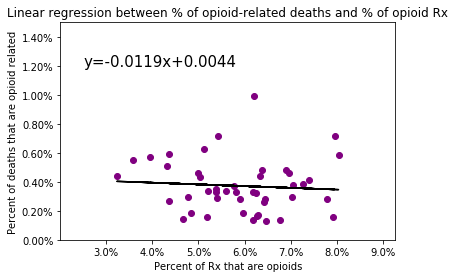

In [5]:
merge_df['opioid_rx_pct']=merge_df['Total Opioid Rx']/merge_df['Total Rx']
merge_df['opioid_od_pct']=merge_df['KFF_opioid_deaths']/merge_df['Deaths']
x_values=merge_df['opioid_rx_pct']
y_values=merge_df['opioid_od_pct']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y="+str(round(slope,4))+"x+"+str(round(intercept,4))
plt.scatter(x_values,y_values,color='purple')
plt.plot(x_values,regress_values,"r-",color="black")
plt.annotate(line_eq,(.025,.012), fontsize=15,color="black")
plt.ylim(0,.015)
plt.xlabel("Percent of Rx that are opioids")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.title("Linear regression between % of opioid-related deaths and % of opioid Rx")
plt.ylabel("Percent of deaths that are opioid related")
plt.savefig("visualizations/death_vs_rx.png", bbox_inches='tight')
plt.show()

In [6]:
correlation=st.pearsonr(merge_df['opioid_rx_pct'],merge_df['opioid_od_pct'])
print(f"The correlation between percent of prescriptions that are opioids and percent of deaths that are opioid ODs is {round(correlation[0],2)}.")

The correlation between percent of prescriptions that are opioids and percent of deaths that are opioid ODs is -0.08.


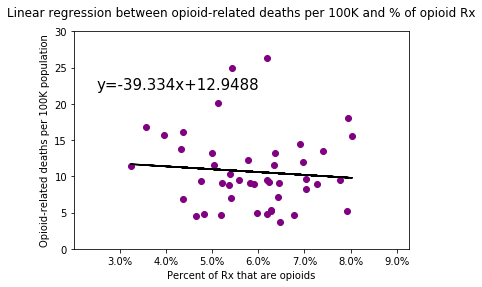

In [7]:
merge_df['opioid_rx_pct']=merge_df['Total Opioid Rx']/merge_df['Total Rx']
merge_df['opioid_od_100k']=(merge_df['KFF_opioid_deaths']/merge_df['Population'])*100000
x_values=merge_df['opioid_rx_pct']
y_values=merge_df['opioid_od_100k']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y="+str(round(slope,4))+"x+"+str(round(intercept,4))
plt.scatter(x_values,y_values,color='purple')
plt.plot(x_values,regress_values,"r-",color="black")
plt.annotate(line_eq,(.025,22), fontsize=15,color="black")
plt.ylim(0,30)
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))

plt.title("Linear regression between opioid-related deaths per 100K and % of opioid Rx", pad=15)
plt.xlabel("Percent of Rx that are opioids")
plt.ylabel("Opioid-related deaths per 100K population")
plt.savefig("visualizations/death_100k_vs_rx.png", bbox_inches='tight')
plt.show()

In [8]:
correlation=st.pearsonr(merge_df['opioid_rx_pct'],merge_df['opioid_od_100k'])
print(f"The correlation between percent of prescriptions that are opioids and opioid deaths per 100K population is {round(correlation[0],2)}.")

The correlation between percent of prescriptions that are opioids and opioid deaths per 100K population is -0.09.
